In [9]:
cd ~/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Data

/Users/BotezatuCristian/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Data


In [10]:
import pandas as pd
df = pd.read_excel('DataSet.xlsx')

df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) ]
df.head()

,ID,Date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,new,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.001389,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,1.297917,82,1518,1600


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
sub_df = df[[ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] 
#sub_df = df[['temp', 'atemp', 'hum', 'windspeed']] 
cols = [ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 
#cols = ['temp', 'atemp', 'hum', 'windspeed'] 
for each in cols: 
    dummies = pd.get_dummies(sub_df[each], prefix=each) 
    sub_df = sub_df.drop(each, axis = 1) 
    sub_df = pd.concat([ dummies, sub_df], axis=1)
X = sub_df.values
y = np.asarray(df['new'])
reg = LinearRegression().fit(X , y)
reg.get_params()
reg.coef_

array([ 5.07837743e+12,  5.07837743e+12,  5.07837743e+12,  5.38174449e+14,
        3.57204063e+15,  4.49928170e+15,  1.46541553e+15,  1.46541553e+15,
        1.46541553e+15,  1.46541553e+15,  1.46541553e+15,  4.49928170e+15,
       -1.28795755e+15,  1.74590862e+15, -1.06637370e+15, -1.06637370e+15,
       -1.06637370e+15, -1.06637370e+15, -1.06637370e+15, -1.06637370e+15,
       -1.06637370e+15, -1.06637370e+15, -1.06637370e+15, -1.06637370e+15,
       -1.06637370e+15, -1.06637370e+15,  2.19527264e+14,  2.19527264e+14,
        2.19527264e+14,  2.19527264e+14])

In [12]:
cd ~/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Scripts

/Users/BotezatuCristian/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Scripts


In [13]:
X.shape

(561, 30)

In [14]:
cd ~/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Tools

/Users/BotezatuCristian/Desktop/SemesterV/Introduction_to_Machine_Learning/Toolbox_Python/Tools


# Forward selection linear regression

Cross validation fold 1/5
Features no: 2

Cross validation fold 2/5
Features no: 3

Cross validation fold 3/5
Features no: 5

Cross validation fold 4/5
Features no: 3

Cross validation fold 5/5
Features no: 3



Linear regression without feature selection:

- Training error: 8.445151134473199e-31
- Test error:     8.030711273134616e-31
- R^2 train:     1.0
- R^2 test:     1.0
Linear regression with feature selection:

- Training error: 2.180847461822104e-31
- Test error:     2.1457545776525572e-31
- R^2 train:     1.0
- R^2 test:     1.0


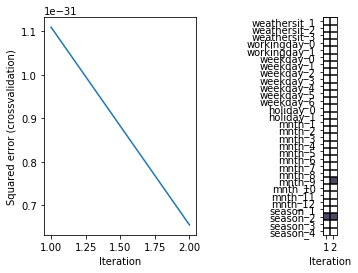

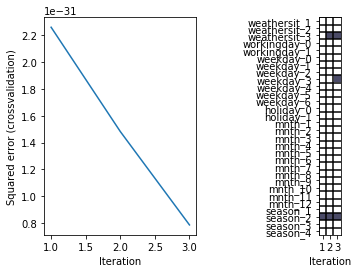

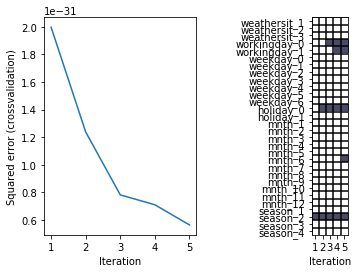

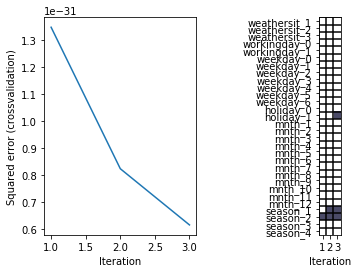

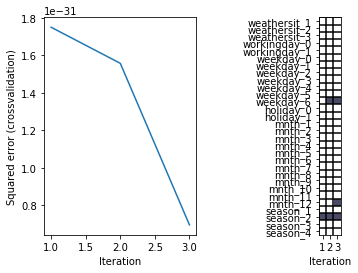

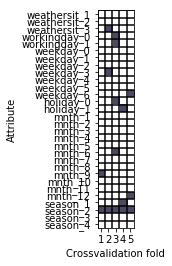

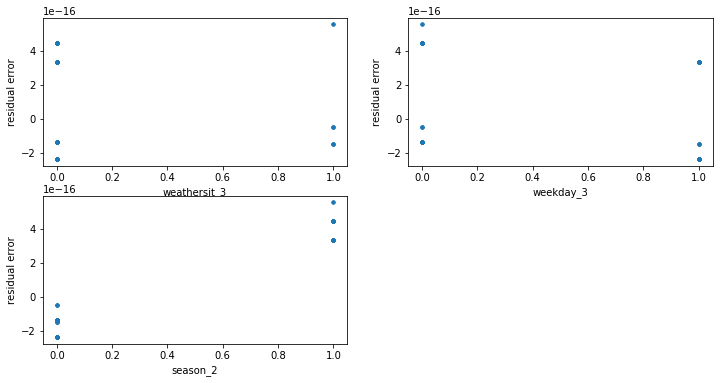

Ran Exercise 6.2.1


In [15]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 20
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
#     print('Train indices: {0}'.format(train_index))
#     print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
    
show()

print('Ran Exercise 6.2.1')

In [3]:
import numpy as np
np.arange(2,16,2)

array([ 2,  4,  6,  8, 10, 12, 14])

In [5]:
# exercise 8.2.6

from matplotlib.pyplot import figure, plot, subplot, title, show, bar
import numpy as np
from scipy.io import loadmat
import neurolab as nl
from sklearn import model_selection
from scipy import stats

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape
C = 2

# Normalize data
X = stats.zscore(X);
                
## Normalize and compute PCA (UNCOMMENT to experiment with PCA preprocessing)
#Y = stats.zscore(X,0);
#U,S,V = np.linalg.svd(Y,full_matrices=False)
#V = V.T
##Components to be included as features
#k_pca = 3
#X = X @ V[:,0:k_pca]
#N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = np.arange(2,16,2)     # number of hidden units
n_train = 5             # number of networks trained in each k-fold
learning_goal = 100     # stop criterion 1 (train mse to be reached)
max_epochs = 64         # stop criterion 2 (max epochs in training)
show_error_freq = 5     # frequency of training status updates

# K-fold crossvalidation
K = 10                   # only three folds to speed up this example
CV = model_selection.KFold(K,shuffle=True)

# Variable for classification error
errors = np.zeros(K)*np.nan
error_hist = np.zeros((max_epochs,K))*np.nan
bestnet = list()
k=0
for train_index, test_index in CV.split(X,y):
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    best_train_error = np.inf
    for i in range(n_train):
        print('Training network {0}/{1}...'.format(i+1,n_train))
        # Create randomly initialized network with 2 layers
        ann = nl.net.newff([[-3, 3]]*M, [n_hidden_units[i], 1], [nl.trans.TanSig(),nl.trans.PureLin()])
        if i==0:
            bestnet.append(ann)
        # train network
        train_error = ann.train(X_train, y_train.reshape(-1,1), goal=learning_goal, epochs=max_epochs, show=show_error_freq)
        if train_error[-1]<best_train_error:
            bestnet[k]=ann
            best_train_error = train_error[-1]
            error_hist[range(len(train_error)),k] = train_error

    print('Best train error: {0}...'.format(best_train_error))
    y_est = bestnet[k].sim(X_test).squeeze()
    errors[k] = np.power(y_est-y_test,2).sum().astype(float)/y_test.shape[0]
    k+=1
    #break

# Print the average least squares error
print('Mean-square error: {0}'.format(np.mean(errors)))

figure(figsize=(6,7));
subplot(2,1,1); bar(range(0,K),errors); title('Mean-square errors');
subplot(2,1,2); plot(error_hist); title('Training error as function of BP iterations');
figure(figsize=(6,7));
subplot(2,1,1); plot(y_est); plot(y_test); title('Last CV-fold: est_y vs. test_y'); 
subplot(2,1,2); plot((y_est-y_test)); title('Last CV-fold: prediction error (est_y-test_y)'); 
show()

print('Ran Exercise 8.2.6')

#% The weights if the network can be extracted via
#bestnet[0].layers[0].np['w'] # Get the weights of the first layer
#bestnet[0].layers[0].np['b'] # Get the bias of the first layer


NameError: name 'X' is not defined